In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [99]:
region = pd.read_csv('data/Region_final.csv')
patient_info = pd.read_csv('data/PatientInfo.csv')

In [100]:
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,bar_count,restraunt_count,patient_count,cafe_count,gym_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,NaN,NaN,NaN,NaN,NaN
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,179.0,380.0,83.0,80.0,292.0
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,116.0,257.0,35.0,14.0,64.0
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,64.0,248.0,24.0,5.0,130.0
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,126.0,411.0,78.0,20.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94,NaN,NaN,NaN,NaN,NaN
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83,NaN,NaN,NaN,NaN,NaN
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96,NaN,NaN,NaN,NaN,NaN
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245,NaN,NaN,NaN,NaN,NaN


In [101]:
seoul = (region.province == 'Seoul')

In [102]:
region[seoul]

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,bar_count,restraunt_count,patient_count,cafe_count,gym_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,NaN,NaN,NaN,NaN,NaN
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,179.0,380.0,83.0,80.0,292.0
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,116.0,257.0,35.0,14.0,64.0
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,64.0,248.0,24.0,5.0,130.0
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,126.0,411.0,78.0,20.0,166.0
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,188.0,309.0,113.0,11.0,158.0
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723,14.0,254.0,17.0,15.0,104.0
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741,32.0,504.0,85.0,10.0,156.0
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475,48.0,274.0,32.0,10.0,88.0
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952,21.0,376.0,43.0,13.0,232.0


In [104]:
region_seoul = region[seoul].dropna(axis=0)
region_seoul

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,bar_count,restraunt_count,patient_count,cafe_count,gym_count
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,179.0,380.0,83.0,80.0,292.0
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,116.0,257.0,35.0,14.0,64.0
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,64.0,248.0,24.0,5.0,130.0
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,126.0,411.0,78.0,20.0,166.0
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,188.0,309.0,113.0,11.0,158.0
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723,14.0,254.0,17.0,15.0,104.0
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741,32.0,504.0,85.0,10.0,156.0
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475,48.0,274.0,32.0,10.0,88.0
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952,21.0,376.0,43.0,13.0,232.0
10,10100,Seoul,Dobong-gu,37.668952,127.047082,23,26,1,0.95,17.89,7.2,485,21.0,247.0,62.0,2.0,100.0


In [105]:
region_seoul.drop(['code','latitude','longitude'], axis=1, inplace=True)

In [106]:
region_seoul.drop(['university_count', 'elderly_population_ratio', 'elderly_alone_ratio', 'bar_count','restraunt_count','cafe_count','gym_count'], axis=1, inplace=True)

In [107]:
region_seoul

,province,city,elementary_school_count,kindergarten_count,academy_ratio,nursing_home_count,patient_count
1,Seoul,Gangnam-gu,33,38,4.18,3088,83.0
2,Seoul,Gangdong-gu,27,32,1.54,1023,35.0
3,Seoul,Gangbuk-gu,14,21,0.67,628,24.0
4,Seoul,Gangseo-gu,36,56,1.17,1080,78.0
5,Seoul,Gwanak-gu,22,33,0.89,909,113.0
6,Seoul,Gwangjin-gu,22,33,1.16,723,17.0
7,Seoul,Guro-gu,26,34,1.00,741,85.0
8,Seoul,Geumcheon-gu,18,19,0.96,475,32.0
9,Seoul,Nowon-gu,42,66,1.39,952,43.0
10,Seoul,Dobong-gu,23,26,0.95,485,62.0


In [108]:
people_corr = region_seoul.corr()

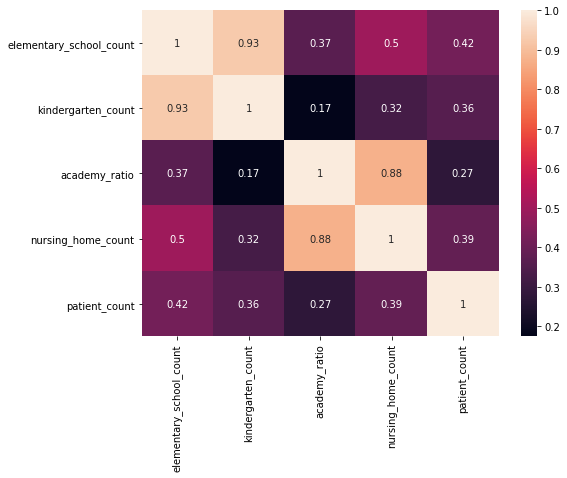

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(people_corr, annot=True)
plt.show()

In [36]:
region_seoul.drop(['elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio',
                  'elderly_alone_ratio', 'nursing_home_count'], axis=1, inplace=True)

In [37]:
region_seoul

,province,city,bar_count,restraunt_count,patient_count,cafe_count,gym_count
1,Seoul,Gangnam-gu,179.0,380.0,83.0,80.0,292.0
2,Seoul,Gangdong-gu,116.0,257.0,35.0,14.0,64.0
3,Seoul,Gangbuk-gu,64.0,248.0,24.0,5.0,130.0
4,Seoul,Gangseo-gu,126.0,411.0,78.0,20.0,166.0
5,Seoul,Gwanak-gu,188.0,309.0,113.0,11.0,158.0
6,Seoul,Gwangjin-gu,14.0,254.0,17.0,15.0,104.0
7,Seoul,Guro-gu,32.0,504.0,85.0,10.0,156.0
8,Seoul,Geumcheon-gu,48.0,274.0,32.0,10.0,88.0
9,Seoul,Nowon-gu,21.0,376.0,43.0,13.0,232.0
10,Seoul,Dobong-gu,21.0,247.0,62.0,2.0,100.0


In [38]:
seoul_corr = region_seoul.corr()

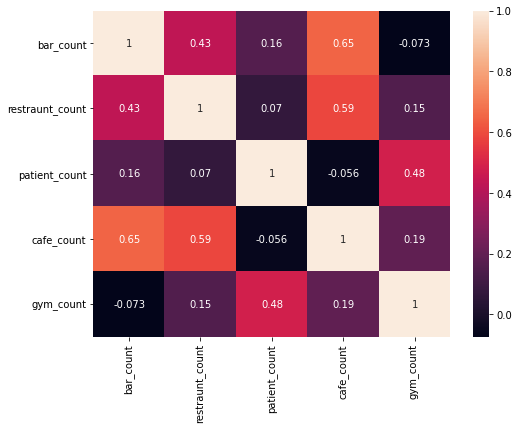

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(seoul_corr, annot=True)
plt.show()

In [62]:
list = []
for i, city in enumerate(region_seoul.city):
    list.append(city)
    
list

['Gangnam-gu',
 'Gangdong-gu',
 'Gangbuk-gu',
 'Gangseo-gu',
 'Gwanak-gu',
 'Gwangjin-gu',
 'Guro-gu',
 'Geumcheon-gu',
 'Nowon-gu',
 'Dobong-gu',
 'Dongdaemun-gu',
 'Dongjak-gu',
 'Mapo-gu',
 'Seodaemun-gu',
 'Seocho-gu',
 'Seongdong-gu',
 'Seongbuk-gu',
 'Songpa-gu',
 'Yangcheon-gu',
 'Yeongdeungpo-gu',
 'Yongsan-gu',
 'Eunpyeong-gu',
 'Jongno-gu',
 'Jung-gu',
 'Jungnang-gu']

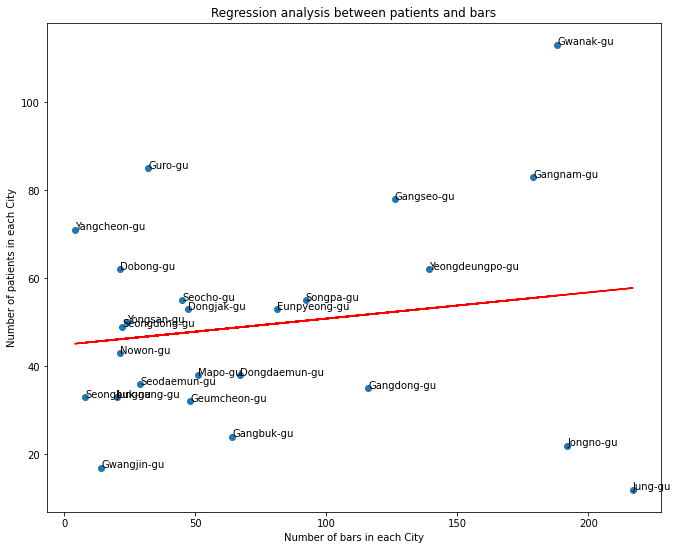

In [81]:
# Regression analysis between patients and bars
X = region_seoul.iloc[:, 2].values.reshape(-1,1)
Y = region_seoul.iloc[:, 4].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

annotations = list

plt.figure(figsize = (11,9))
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regression analysis between patients and bars')
plt.xlabel('Number of bars in each City')
plt.ylabel('Number of patients in each City')
for i,label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

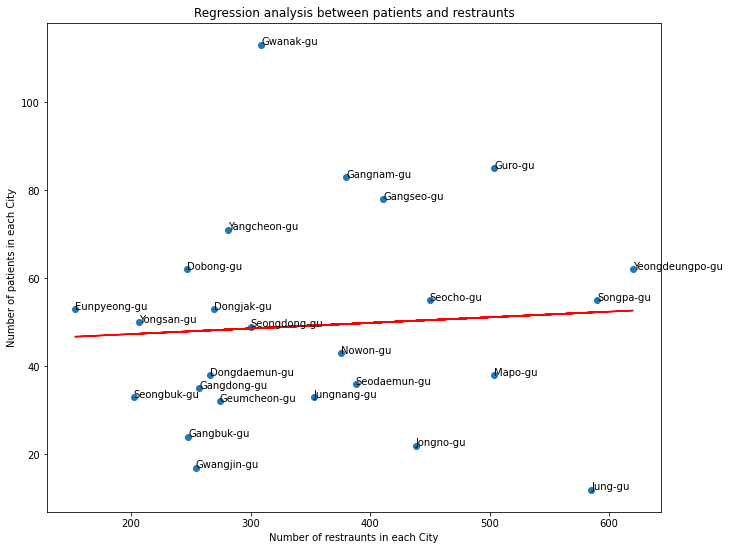

In [82]:
# Regression analysis between patients and restraunts
X = region_seoul.iloc[:, 3].values.reshape(-1,1)
Y = region_seoul.iloc[:, 4].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

annotations = list

plt.figure(figsize = (11,9))
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regression analysis between patients and restraunts')
plt.xlabel('Number of restraunts in each City')
plt.ylabel('Number of patients in each City')
for i,label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

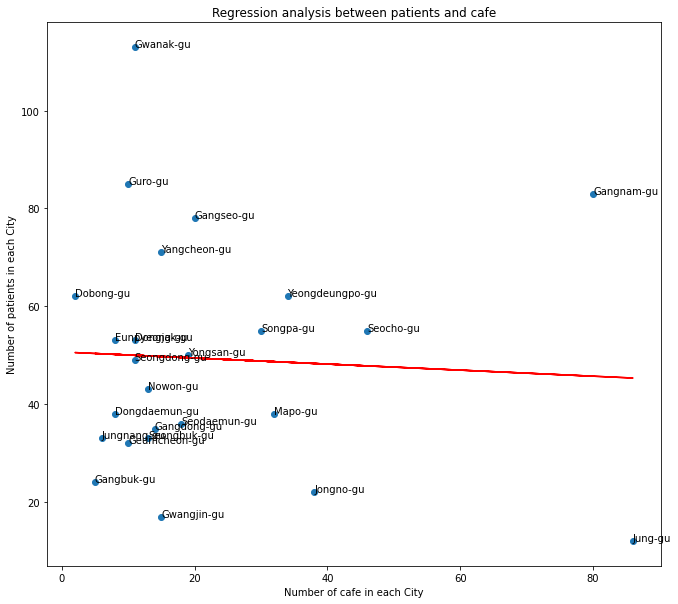

In [84]:
# Regression analysis between patients and cafe
X = region_seoul.iloc[:, 5].values.reshape(-1,1)
Y = region_seoul.iloc[:, 4].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

annotations = list

plt.figure(figsize = (11,10))
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regression analysis between patients and cafe')
plt.xlabel('Number of cafe in each City')
plt.ylabel('Number of patients in each City')
for i,label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
plt.show()

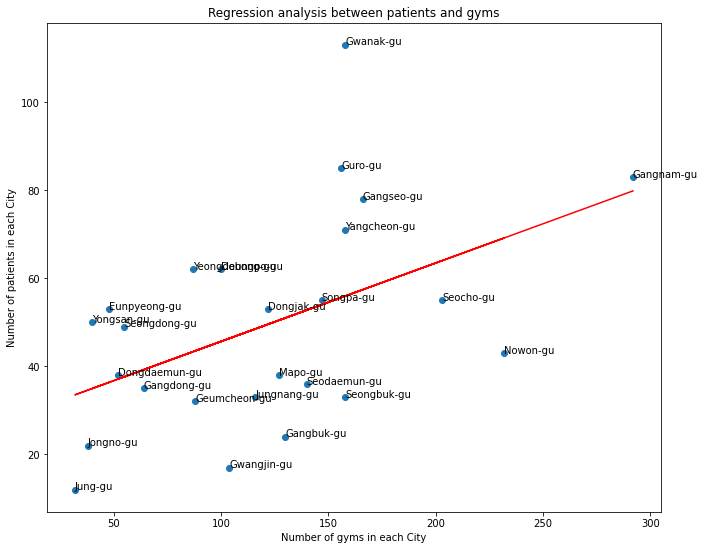

In [86]:
# Regression analysis between patients and gyms
X = region_seoul.iloc[:, 6].values.reshape(-1,1)
Y = region_seoul.iloc[:, 4].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

annotations = list

plt.figure(figsize = (11,9))
plt.scatter(X,Y)
plt.plot(X, Y_pred, color='red')
plt.title('Regression analysis between patients and gyms')
plt.xlabel('Number of gyms in each City')
plt.ylabel('Number of patients in each City')
for i,label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))
plt.show()